# Load labelX images and manually count positive cells

by Pu Zheng

2023.11.24

In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

1329447


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn
import ImageAnalysis3 as ia3
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast
from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

import pickle

In [3]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [47]:
meta_data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/'

condition_2_images = {}


for _fd in os.listdir(meta_data_folder):
    if os.path.isdir(os.path.join(meta_data_folder, _fd)) and 'Analysis' not in _fd:
        print(_fd)
        #_data_folder = os.path.join(meta_data_folder, _fd, 'H0M1')
        # scan subfolders
        folders, fovs = data_organization.search_fovs_in_folders(os.path.join(meta_data_folder, _fd))
        
        sel_fov_ids = np.arange(1,len(fovs), 10)
        
        condition_2_images[_fd] = []
        for _fov_id in sel_fov_ids:
            image_filename = os.path.join(folders[0], fovs[_fov_id]) #select fov here
            print(image_filename)
            # load image
            daxp = dax_process.DaxProcesser(image_filename,
                                CorrectionFolder=r'/lab/weissman_imaging/puzheng/Corrections/20231012-Merscope01_s40_n500', # Merscope01
                               )
            daxp._load_image()
            daxp._corr_illumination()
            # append
            condition_2_images[_fd].append(np.array([daxp.im_748, daxp.im_637, daxp.im_405]))
    

negControl
- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl
-- 1 folders, 84 fovs detected.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl/H0M1/Conv_zscan_01.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl/H0M1/Conv_zscan_01.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl/H0M1/Conv_zscan_01_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.000s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start illumination correction for channels:['748', '637', '545', '477', '405'].
-- loading illumination correction profile from file:
	 748 illumination_co

-- corrected illumination for channel 637 in 4.306s.
-- corrected illumination for channel 545 in 4.260s.
-- corrected illumination for channel 477 in 4.119s.
-- corrected illumination for channel 405 in 5.301s.
- Finished illumination correction in 22.360s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl/H0M1/Conv_zscan_61.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl/H0M1/Conv_zscan_61.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/negControl/H0M1/Conv_zscan_61_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 9.305s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start illumination correction for channels:

-- corrected illumination for channel 748 in 4.977s.
-- corrected illumination for channel 637 in 5.174s.
-- corrected illumination for channel 545 in 6.669s.
-- corrected illumination for channel 477 in 6.748s.
-- corrected illumination for channel 405 in 5.873s.
- Finished illumination correction in 29.540s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-20/H0M1/Conv_zscan_031.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-20/H0M1/Conv_zscan_031.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-20/H0M1/Conv_zscan_031_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 9.079s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start

-- corrected illumination for channel 748 in 4.581s.
-- corrected illumination for channel 637 in 5.046s.
-- corrected illumination for channel 545 in 6.155s.
-- corrected illumination for channel 477 in 5.957s.
-- corrected illumination for channel 405 in 5.927s.
- Finished illumination correction in 27.783s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-20/H0M1/Conv_zscan_091.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-20/H0M1/Conv_zscan_091.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-20/H0M1/Conv_zscan_091_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 12.159s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Star

-- corrected illumination for channel 748 in 4.974s.
-- corrected illumination for channel 637 in 4.725s.
-- corrected illumination for channel 545 in 5.007s.
-- corrected illumination for channel 477 in 4.572s.
-- corrected illumination for channel 405 in 4.548s.
- Finished illumination correction in 23.935s.
1-10
- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10
-- 1 folders, 156 fovs detected.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_001.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_001_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.496s.
- Correct illuminatio

-- corrected illumination for channel 748 in 4.312s.
-- corrected illumination for channel 637 in 4.339s.
-- corrected illumination for channel 545 in 4.986s.
-- corrected illumination for channel 477 in 4.944s.
-- corrected illumination for channel 405 in 4.916s.
- Finished illumination correction in 23.605s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_061.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_061.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_061_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 10.630s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Star

-- corrected illumination for channel 748 in 4.769s.
-- corrected illumination for channel 637 in 4.934s.
-- corrected illumination for channel 545 in 5.368s.
-- corrected illumination for channel 477 in 5.267s.
-- corrected illumination for channel 405 in 5.411s.
- Finished illumination correction in 25.848s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_121.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_121.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-10/H0M1/Conv_zscan_121_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.123s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start

-- corrected illumination for channel 748 in 4.107s.
-- corrected illumination for channel 637 in 4.359s.
-- corrected illumination for channel 545 in 5.447s.
-- corrected illumination for channel 477 in 5.254s.
-- corrected illumination for channel 405 in 4.998s.
- Finished illumination correction in 24.265s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_021.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_021.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_021_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 12.140s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start i

-- corrected illumination for channel 748 in 4.360s.
-- corrected illumination for channel 637 in 4.017s.
-- corrected illumination for channel 545 in 5.808s.
-- corrected illumination for channel 477 in 4.619s.
-- corrected illumination for channel 405 in 5.705s.
- Finished illumination correction in 24.606s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_081.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_081.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_081_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.153s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start il

-- corrected illumination for channel 748 in 4.373s.
-- corrected illumination for channel 637 in 4.495s.
-- corrected illumination for channel 545 in 4.623s.
-- corrected illumination for channel 477 in 4.952s.
-- corrected illumination for channel 405 in 5.241s.
- Finished illumination correction in 23.793s.
/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_141.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_141.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231120-4T1v21x_cell_labelX_test/1-5/H0M1/Conv_zscan_141_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 13.691s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start i

In [5]:
condition_2_images.keys()

dict_keys(['negControl', '1-20', '1-10', '1-5'])

<IPython.core.display.Javascript object>


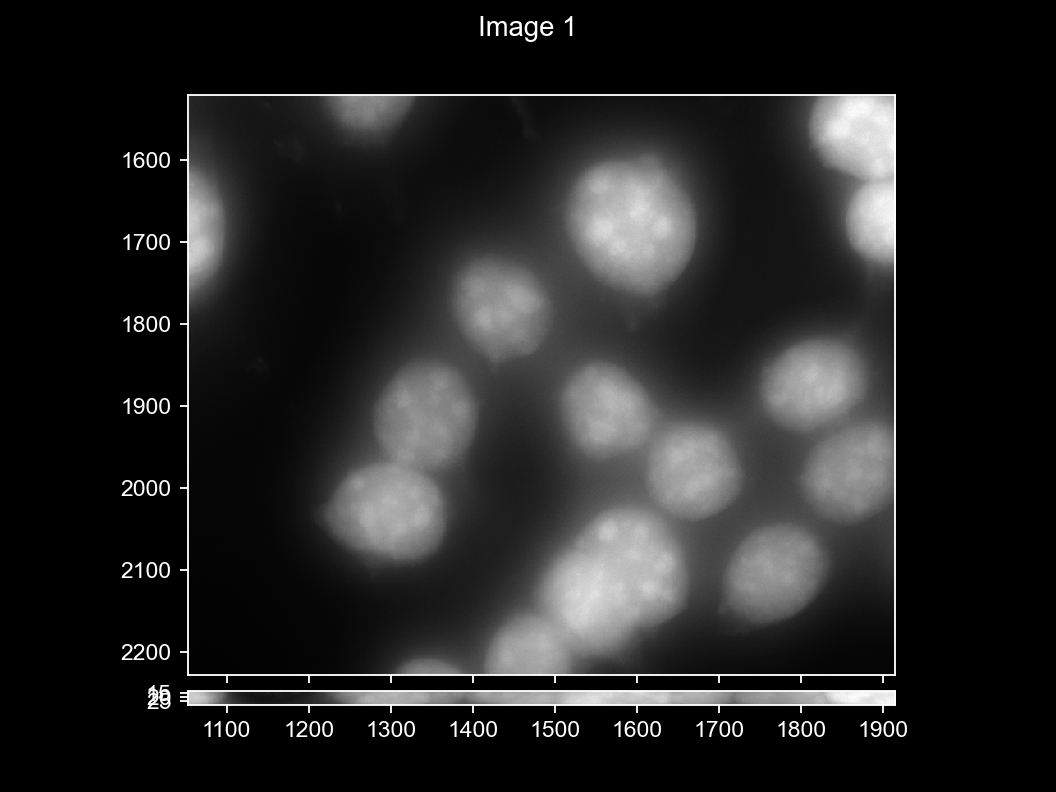

In [7]:
%matplotlib notebook
fig = plt.figure(dpi=150)
interactive.imshow_mark_3d([_ims[-1] for _ims in condition_2_images['1-20']], fig=fig, min_max_default=[1000,5000])

In [8]:
import matplotlib.pyplot as plt
def _rescaling(im, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(im)
    if vmax is None:
        vmax = np.max(im)
    _res_im = np.clip(im, vmin, vmax)
    _res_im = (_res_im - vmin) / (vmax - vmin)
    _res_im = (_res_im * np.iinfo(np.uint8).max ).astype(np.uint8)
    return _res_im
def rescale_by_percentile(im, min_max_percent=[30,99.9]):
    from scipy.stats import scoreatpercentile
    vmin, vmax = scoreatpercentile(im, min(min_max_percent)), scoreatpercentile(im, max(min_max_percent))
    return _rescaling(im, vmin=vmin, vmax=vmax)

In [29]:
1-43/268

0.8395522388059702

In [33]:
counts = np.array([[20,85],[5,31],[7,62],[8,51],[3,39],[4,53]]).sum(0)
print(1-counts[0]/counts[1])

0.8535825545171339


In [64]:

counts = np.array([[2,4],[11,107],[0,16], [10,35]]).sum(0)
print(1-counts[0]/counts[1])

0.8580246913580247


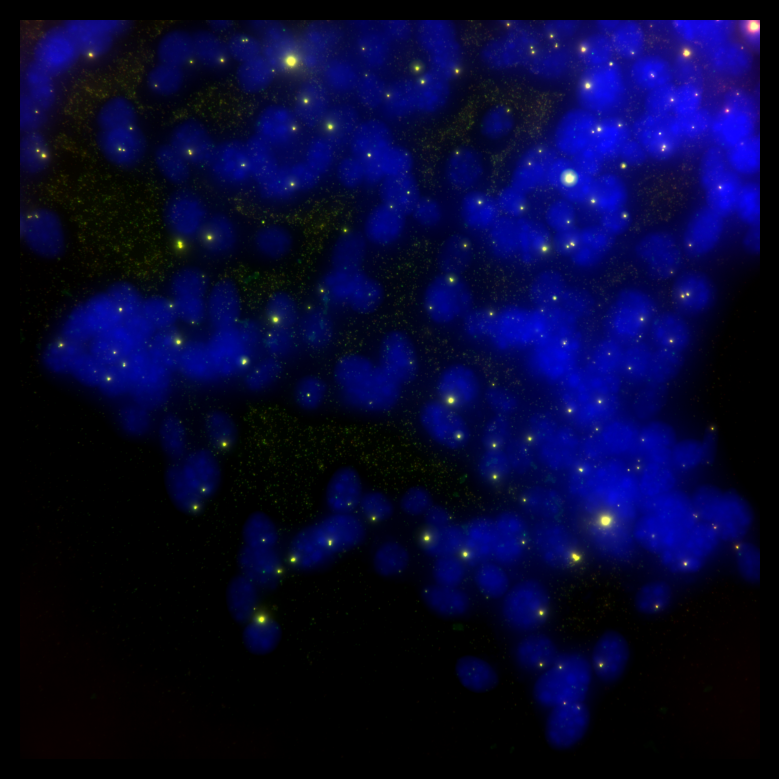

In [65]:
_ims = condition_2_images['negControl'][2]

sel_im_proj = np.array([rescale_by_percentile(_img.max(0)) 
                        for _img in _ims]).transpose(1,2,0)
%matplotlib inline
plt.figure(dpi=200)
plt.imshow(sel_im_proj)
plt.axis('off')
plt.show()

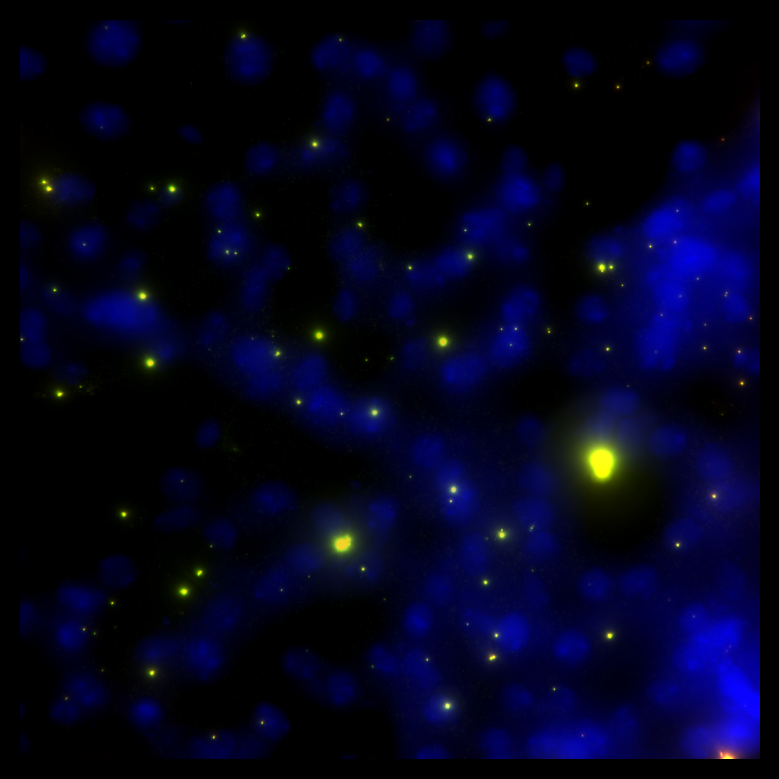

In [84]:
_ims = condition_2_images['1-10'][1]

sel_im_proj = np.array([rescale_by_percentile(_img.max(0)) 
                        for _img in _ims]).transpose(1,2,0)
%matplotlib inline
plt.figure(dpi=200)
plt.imshow(sel_im_proj)
plt.axis('off')
plt.show()

In [57]:
len('          ')

10

In [81]:
counts2

array([173, 271])

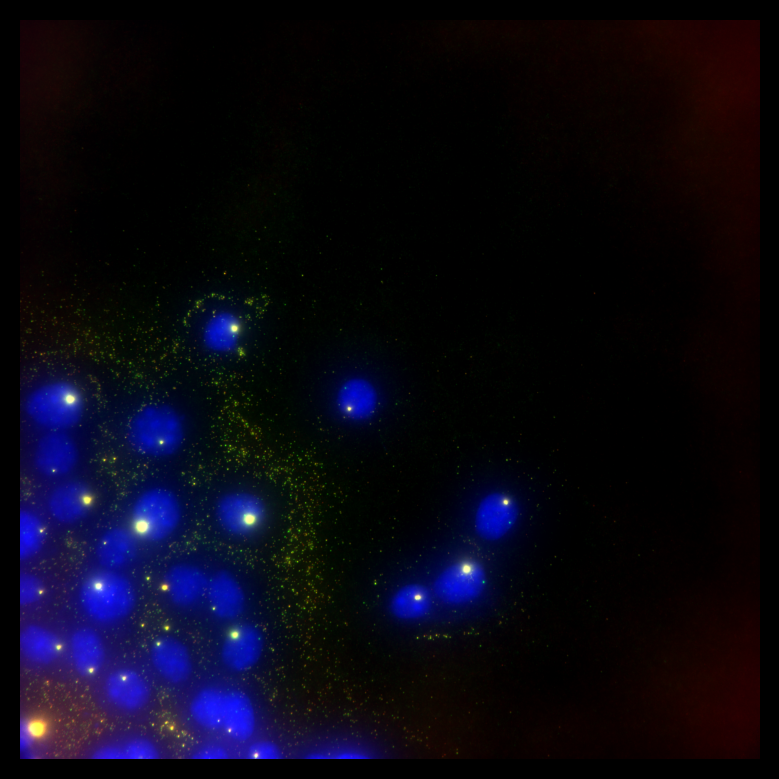

In [81]:
_ims = condition_2_images['1-20'][9]

sel_im_proj = np.array([rescale_by_percentile(_img.max(0)) 
                        for _img in _ims]).transpose(1,2,0)

plt.figure(dpi=200)
plt.imshow(sel_im_proj)
plt.axis('off')
plt.show()

In [77]:
len('                                             ')

45